In [15]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import pylab as pl
%matplotlib inline

if os.getenv ('PUI2016') is None:
    print("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print("Must set env variable PUI2016")

In [16]:
def getCitiBikeCSV(datestring):
    
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))

            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            print("File in place, you can continue.")

            if '2014' in datestring or '2013' in datestring:
                    os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                              "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))

            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
                print("WARNING!!! something is wrong: the file is not there!")
    else:
        print("File in place, you can continue.")

In [17]:
pwd

u'/wingrdp/homedirs/xd515/PUI2016_xd515/HW3_xd515'

In [18]:
datestring = "201606"
getCitiBikeCSV(datestring)

File in place, you can continue.


In [19]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv').dropna()
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [20]:
type(df)

pandas.core.frame.DataFrame

In [7]:
data = df[['starttime','gender']]
data.head()

,starttime,gender
0,6/1/2016 00:00:18,1
1,6/1/2016 00:00:20,1
2,6/1/2016 00:00:21,1
3,6/1/2016 00:00:28,1
4,6/1/2016 00:00:53,1


In [8]:
get_hours = lambda x: x[-8:-6]

In [9]:
data['Hours'] = data.starttime.apply(get_hours)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
clean = data.groupby(['gender','Hours']).apply(len).to_frame()

In [11]:
clean.reset_index(level=0,inplace=True)

In [12]:
clean.reset_index(level=0,inplace=True)

In [13]:
clean.columns = ["Hours", "Gender", "Count"]

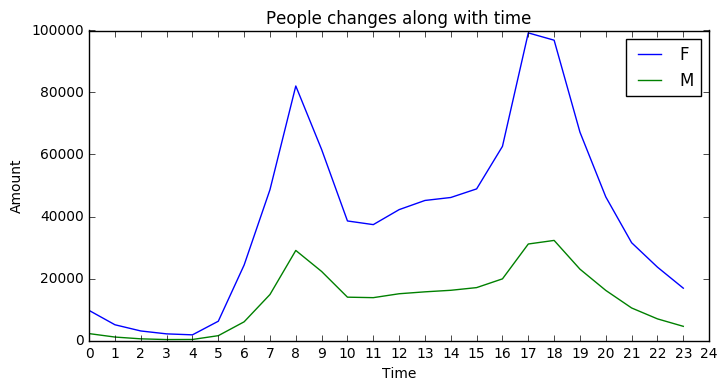

In [14]:
plt.figure(figsize=(8,4))

l1, = plt.plot(clean.Hours[clean.Gender == 1], clean.Count[clean.Gender == 1], label = "F")
l2, = plt.plot(clean.Hours[clean.Gender == 2], clean.Count[clean.Gender == 2], label = "M")

plt.ylabel("Amount"); plt.xlabel("Time")
plt.title("People changes along with time")

plt.xlim((0, 23))
plt.legend(handles=[l1,l2])
plt.xticks(np.arange(0,25))

plt.show()